
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-0.63259567 -0.11967269] [0. 1.]
[-0.49772007  1.6161143 ] [1. 0.]
[ 1.53796181 -0.10452409] [0. 1.]
[ 1.63296256 -0.80688406] [0. 1.]
[ 0.43677972 -1.62556726] [0. 1.]
[ 1.6701608  -1.13632182] [0. 1.]
[-1.13349809  1.74976563] [1. 0.]
[0.18904132 0.77896559] [1. 0.]
[-0.02108275  0.3999332 ] [1. 0.]
[ 1.29160609 -1.1373804 ] [0. 1.]
[-0.18390522  1.34025988] [1. 0.]
[-0.30941342  1.37559024] [1. 0.]
[1.60763603 0.36529501] [0. 1.]
[0.14127449 1.22361478] [1. 0.]
[-0.04099325 -0.4794412 ] [0. 1.]
[-0.44088948  0.42597685] [0. 1.]
[ 0.36056361 -1.00014045] [0. 1.]
[ 0.22506473 -0.65256405] [0. 1.]
[-1.26310343 -0.24923776] [1. 0.]
[-0.04988185 -0.87220566] [0. 1.]
[-0.14798121  1.23142569] [1. 0.]
[ 1.61426037 -1.37647798] [0. 1.]
[0.23186065 0.85849435] [1. 0.]
[ 0.04670195 -1.43294018] [0. 1.]
[-0.5844298   1.52742817] [1. 0.]
[0.28524607 1.0570958 ] [1. 0.]
[-0.17891095 -0.304

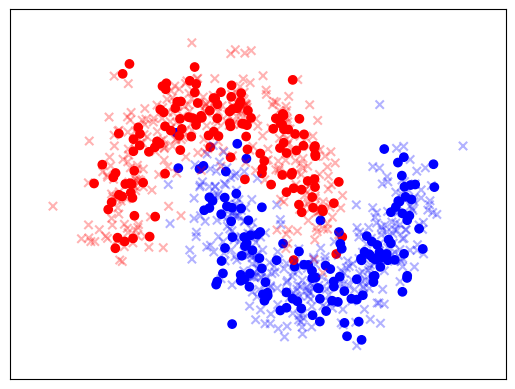

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(1,), learning_rate_init=0.005, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.64897604
Iteration 2, loss = 1.47985964
Iteration 3, loss = 1.39440183
Iteration 4, loss = 1.31866504
Iteration 5, loss = 1.21917009
Iteration 6, loss = 1.09532314
Iteration 7, loss = 0.96836201
Iteration 8, loss = 0.85041684
Iteration 9, loss = 0.76266438


c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


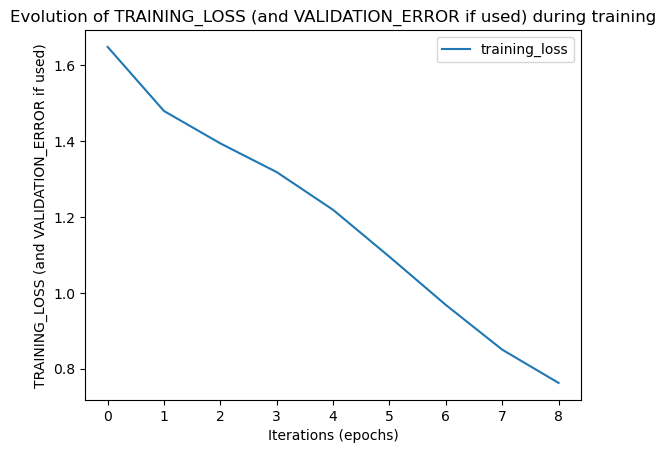

Accuracy (on TEST set) =  0.8396825396825397


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(mlp.loss_curve_, label='training_loss')
if(mlp.validation_scores_ is not None):
    valid_errors = mlp.validation_scores_
    for idx in range(len(mlp.validation_scores_)):
         valid_errors[idx] = 1. - mlp.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Accuracy (on TEST set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

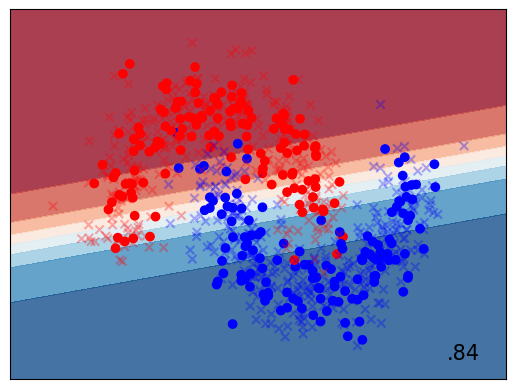

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}

Grid scores on development set:

0.856 (+/-0.036) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.867 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.889 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.922 (+/-0.065) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.878 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.915 (+/-0.038) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.930 (+/-0.058) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.937 (+/-0.028) for {'alpha': 1e-05, 'hidden_lay

c:\Users\arman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3 [Optional]: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.




Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 640x480 with 0 Axes>

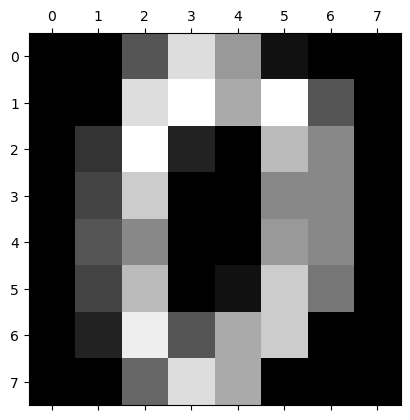

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              verbose=True)
Iteration 1, loss = 1.66006493
Iteration 2, loss = 1.17868959
Iteration 3, loss = 0.90949435
Iteration 4, loss = 0.83446489
Iteration 5, loss = 0.82711687
Iteration 6, loss = 0.74610705
Iteration 7, loss = 0.73312500
Iteration 8, loss = 0.94514513
Iteration 9, loss = 0.80641039


c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


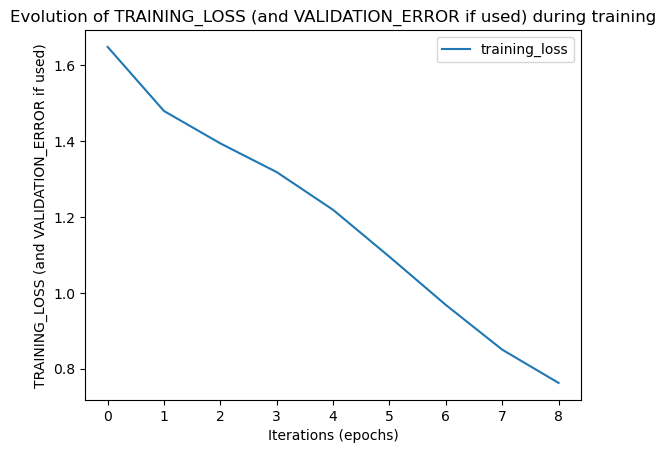

Accuracy (on TEST set) =  0.7185761957730812
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        88
           1       0.62      0.67      0.64        85
           2       0.72      0.90      0.80        91
           3       0.79      0.42      0.55       105
           4       0.85      0.95      0.90        86
           5       0.68      0.89      0.77        80
           6       0.72      0.93      0.81        94
           7       0.79      1.00      0.88        81
           8       0.49      0.26      0.34       100
           9       0.62      0.45      0.52        89

    accuracy                           0.72       899
   macro avg       0.71      0.73      0.70       899
weighted avg       0.71      0.72      0.69       899

CONFUSION MATRIX below


array([[76,  0,  0,  0,  3,  1,  3,  0,  1,  4],
       [ 0, 57,  0,  0,  4,  0, 15,  0,  9,  0],
       [ 2,  2, 82,  0,  0,  2,  2,  0,  1,  0],
       [ 4,  0, 30, 44,  0, 12,  1,  0,  4, 10],
       [ 0,  1,  0,  0, 82,  0,  0,  3,  0,  0],
       [ 3,  0,  0,  0,  0, 71,  1,  1,  1,  3],
       [ 0,  1,  0,  0,  0,  0, 87,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 81,  0,  0],
       [ 0, 29,  1,  1,  3, 11, 12, 10, 26,  7],
       [11,  2,  1, 11,  4,  7,  0,  8,  5, 40]], dtype=int64)

In [5]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(mlp.loss_curve_, label='training_loss')
if(clf.validation_scores_ is not None):
    valid_errors = clf.validation_scores_
    for idx in range(len(clf.validation_scores_)):
         valid_errors[idx] = 1. - clf.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Accuracy (on TEST set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   


**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 640x480 with 0 Axes>

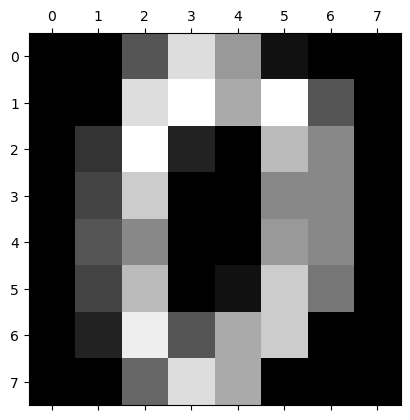

MLPClassifier(alpha=0.001, batch_size=4, early_stopping=True,
              hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=100,
              momentum=0.8, random_state=11, tol=1e-05, validation_fraction=0.2,
              verbose=True)
Iteration 1, loss = 0.96356747
Validation score: 0.885417
Iteration 2, loss = 0.34273839
Validation score: 0.930556
Iteration 3, loss = 0.21448238
Validation score: 0.934028
Iteration 4, loss = 0.17545469
Validation score: 0.937500
Iteration 5, loss = 0.15333921
Validation score: 0.947917
Iteration 6, loss = 0.15132202
Validation score: 0.940972
Iteration 7, loss = 0.12211535
Validation score: 0.947917
Iteration 8, loss = 0.12350568
Validation score: 0.940972
Iteration 9, loss = 0.10859080
Validation score: 0.940972
Iteration 10, loss = 0.10847117
Validation score: 0.944444
Iteration 11, loss = 0.10275800
Validation score: 0.947917
Iteration 12, loss = 0.08983536
Validation score: 0.961806
Iteration 13, loss = 0.11167409
Validation score: 0

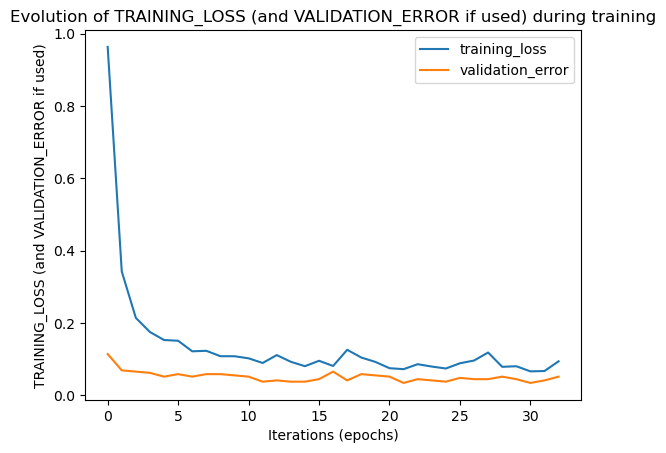

Accuracy (on TEST set) =  0.9444444444444444
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.89      0.94      0.92        35
           2       1.00      0.97      0.99        36
           3       1.00      0.90      0.95        29
           4       0.91      1.00      0.95        30
           5       0.97      0.95      0.96        40
           6       0.96      0.98      0.97        44
           7       1.00      0.92      0.96        39
           8       0.92      0.87      0.89        39
           9       0.90      0.93      0.92        41

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360

CONFUSION MATRIX below


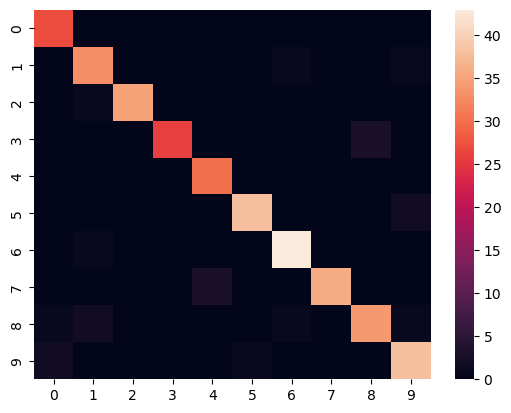

In [6]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = MinMaxScaler().fit_transform(data)
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.2, random_state = 0)

clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', solver='adam', 
                    alpha=0.001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=100, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(clf.loss_curve_, label='training_loss')
if(clf.validation_scores_ is not None):
    valid_errors = clf.validation_scores_
    for idx in range(len(clf.validation_scores_)):
         valid_errors[idx] = 1. - clf.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Accuracy (on TEST set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)
plt.plot(figsize=(15,10))
sns.heatmap(confusion_matrix(y_true, y_pred))
plt.show()


**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

[{'hidden_layer_sizes': [(4,), (8,), (16,), (32,), (10,), (64,), (128,), (256,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001, 5e-05, 0.0005, 0.005, 0.01], 'activation': ['relu', 'tanh', 'logistic'], 'batch_size': [4, 8, 16, 32, 64], 'learning_rate': ['constant', 'adaptive', 'invscaling'], 'max_iter': [50, 100, 200, 500, 1000], 'early_stopping': [True, False]}]


c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

Best parameters set found on development set:

{'max_iter': 500, 'learning_rate_init': 0.03, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (32,), 'early_stopping': False, 'batch_size': 32, 'alpha': 0.0001, 'activation': 'tanh'}

Grid scores on development set:

0.960 (+/-0.009) for {'max_iter': 500, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (8,), 'early_stopping': True, 'batch_size': 8, 'alpha': 1e-05, 'activation': 'logistic'}
0.952 (+/-0.033) for {'max_iter': 200, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'early_stopping': True, 'batch_size': 4, 'alpha': 0.001, 'activation': 'tanh'}
0.963 (+/-0.019) for {'max_iter': 500, 'learning_rate_init': 0.03, 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'early_stopping': True, 'batch_size': 64, 'alpha': 0.0001, 'activation': 'tanh'}
0.967 (+/-0.019) for {'max_iter': 100, 'learning_rate_init': 0.03, 'learning_rate': 'invscaling', 'hidden_laye

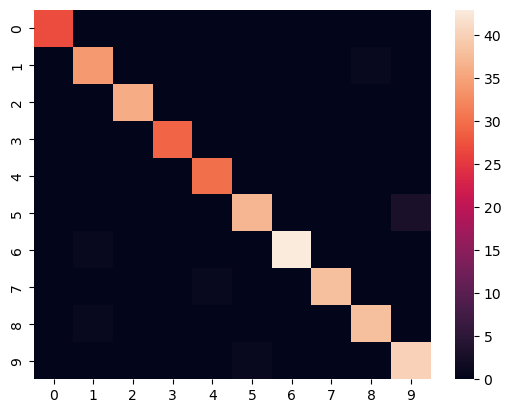

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(4,), (8,), (16,), (32,), (10, ), (64, ), (128, ), (256,)],
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.00005, 0.0005, 0.005, 0.01],
   'activation': ['relu', 'tanh', 'logistic'],
   'batch_size': [4,8,16,32,64,],
   'learning_rate': ['constant', 'adaptive', 'invscaling'],
   'max_iter':[50,100,200,500,1000],
   'early_stopping': [True, False]
  }
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = RandomizedSearchCV( 
                   MLPClassifier(
                      hidden_layer_sizes=(10, ), 
                      activation='relu', 
                      solver='adam', 
                      alpha=0.001, 
                      batch_size=4, 
                      learning_rate='constant', 
                      learning_rate_init=0.01, 
                      power_t=0.5, 
                      max_iter=200, 
                      shuffle=True, 
                      random_state=11, 
                      tol=0.00001, 
                      verbose=False, 
                      warm_start=False, 
                      momentum=0.8, 
                      nesterovs_momentum=True, 
                      early_stopping=True, 
                      validation_fraction=0.2, 
                      beta_1=0.9, 
                      beta_2=0.999, 
                      epsilon=1e-08), 
    param_grid, cv=3, scoring='accuracy', n_iter=100, random_state=0) 
    
clf.fit(Xdigits_train, y_digits_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))
plt.plot(figsize=(15,10))
sns.heatmap(confusion_matrix(y_true, y_pred))
plt.show()

In [8]:
clf.best_params_

{'max_iter': 500,
 'learning_rate_init': 0.03,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (32,),
 'early_stopping': False,
 'batch_size': 32,
 'alpha': 0.0001,
 'activation': 'tanh'}

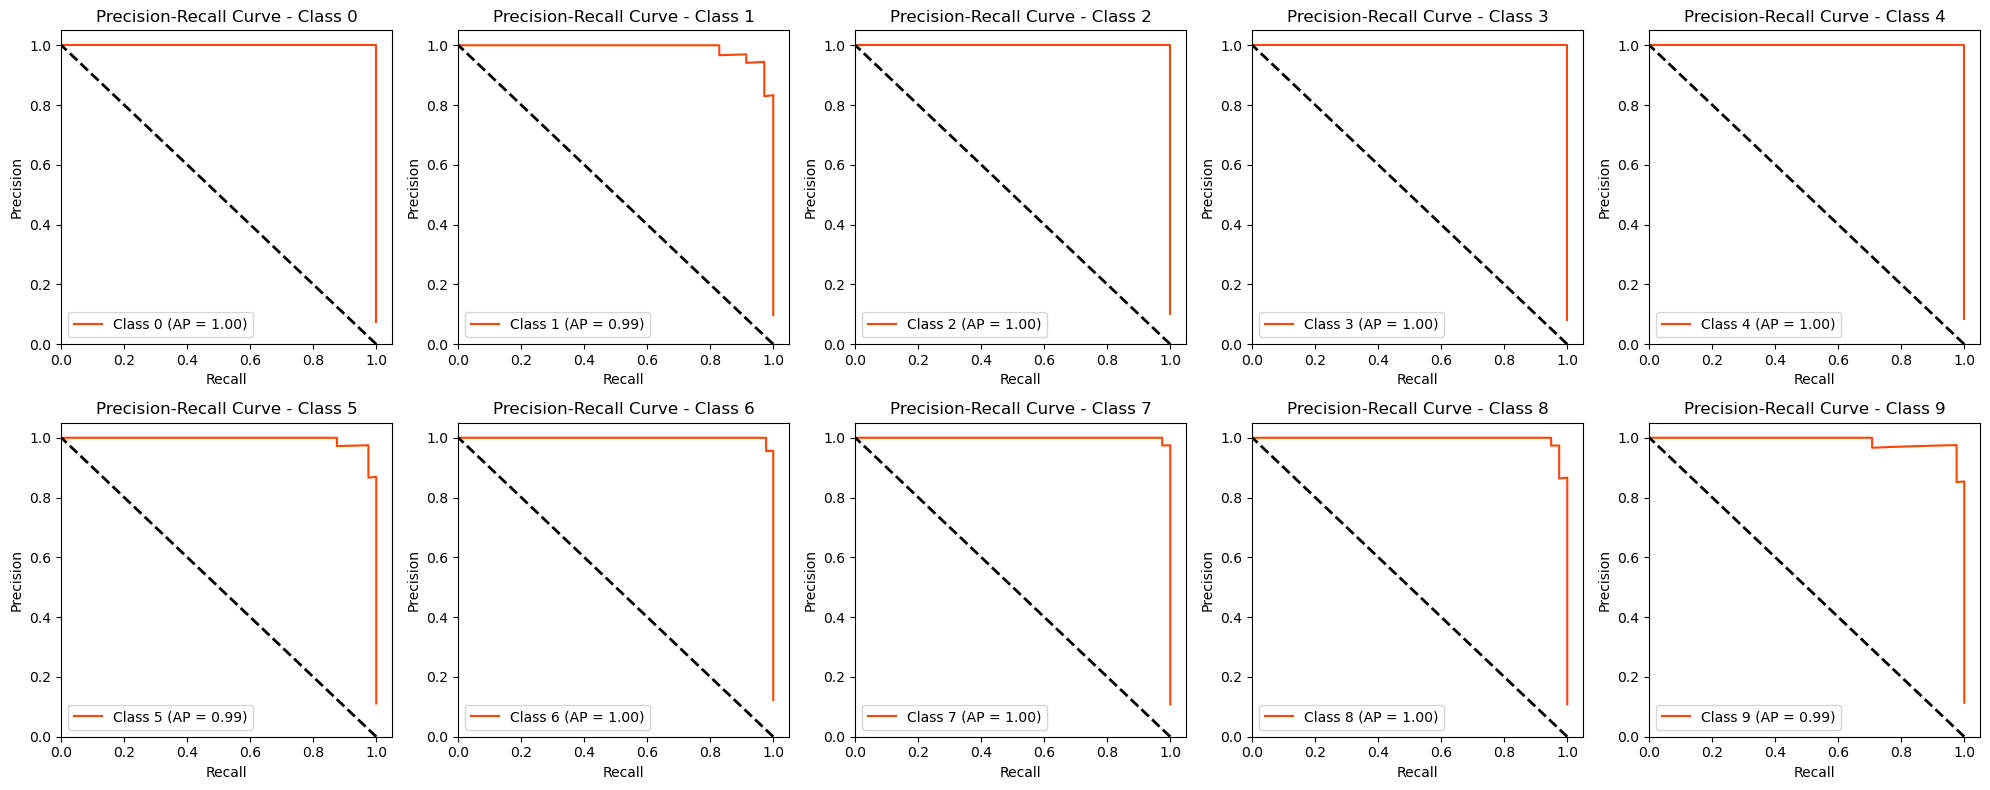

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_prob = clf.predict_proba(Xdigits_test)
n_classes = y_prob.shape[1]  # ici, 10 classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_prob[:, i])

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))  


for i, ax in enumerate(axes.flat):
    ax.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})', c='orangered')
    ax.plot([1, 0], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.05])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve - Class {i}')
    ax.legend(loc="lower left")

plt.tight_layout()
plt.show()